# SC1015 Mini-Project: What are the most important clinical features that allows us to predict whether the patient will develop heart disease?

### Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  
> Sklearn : Machine Learning and Statistical Modeling

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
sb.set() # set the default Seaborn style for graphics
pd. set_option('display.max_columns', None)

## Exploratory Data Analysis

In [2]:
#Import Dataset
heart_data = pd.read_csv('Dataset/heart.csv')
heart_data.head(100)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,M,ASY,130,263,0,Normal,140,Y,2.0,Flat,1
96,43,M,ATA,142,207,0,Normal,138,N,0.0,Up,0
97,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0


In [3]:
heart_data.shape

(918, 12)

Before Dataset is cleaned, there are 918 Rows and 12 Columns

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Metadata
>Age: age of the patient [years]  
>Sex: sex of the patient [M: Male, F: Female]  
>ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  
>RestingBP: resting blood pressure [mm Hg]  
>Cholesterol: serum cholesterol [mm/dl]  
>FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  
>RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
>MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]  
>ExerciseAngina: exercise-induced angina [Y: Yes, N: No]  
>Oldpeak: oldpeak = ST [Numeric value measured in depression]  
>ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  
>HeartDisease: output class [1: heart disease, 0: Normal]  

In [5]:
#remove duplicates
heart_data = heart_data.drop_duplicates()
cols = ['FastingBS','HeartDisease']
heart_data[cols] = heart_data[cols].astype('object') #changing type of column as FastingBS and HeartDisease only consists of 1's and 0's 
heart_data.info()
heart_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [6]:
heart_data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

After Dataset is cleaned, there are 918 Rows and 12 Columns and there are no NULL values in any Row of the data. 

### Analysis of Numerical Predictors

In [7]:
heart_num = heart_data.select_dtypes(include = ['int', 'float'])
#Summary Statistics for all Variables 
heart_num.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


<Axes: >

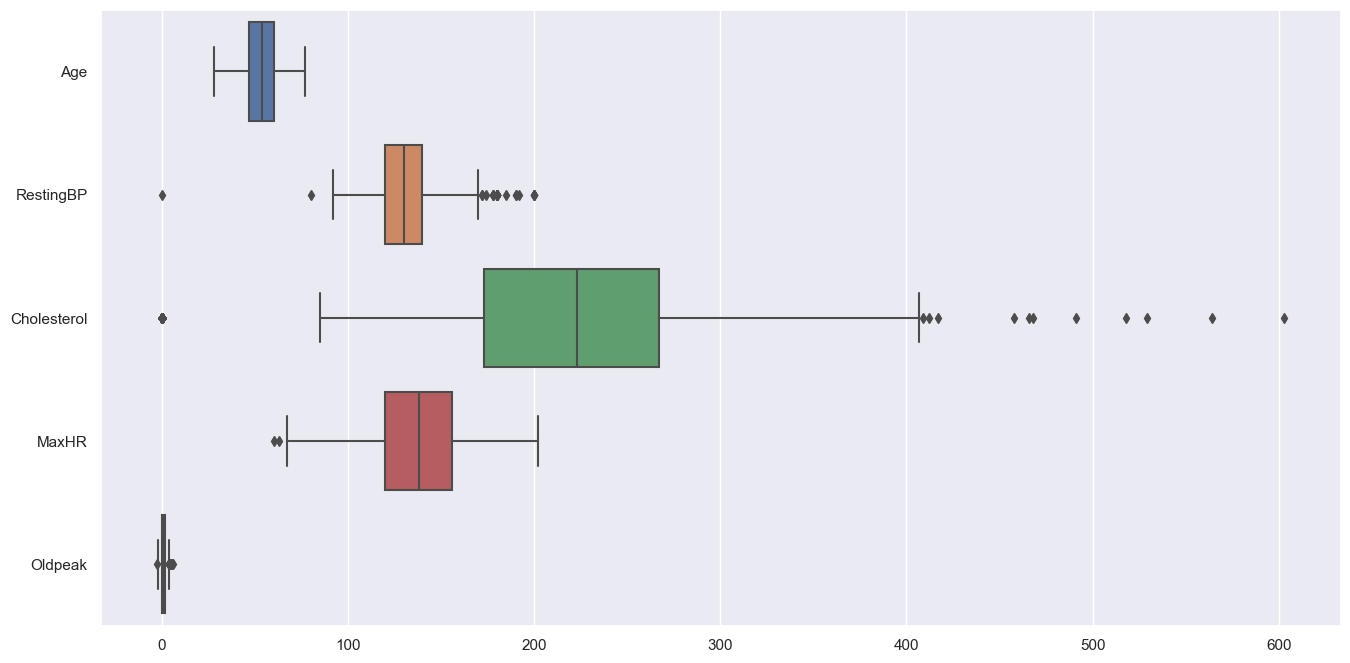

In [8]:
#Box-plot representation of all variables 
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = heart_num, orient = "h")

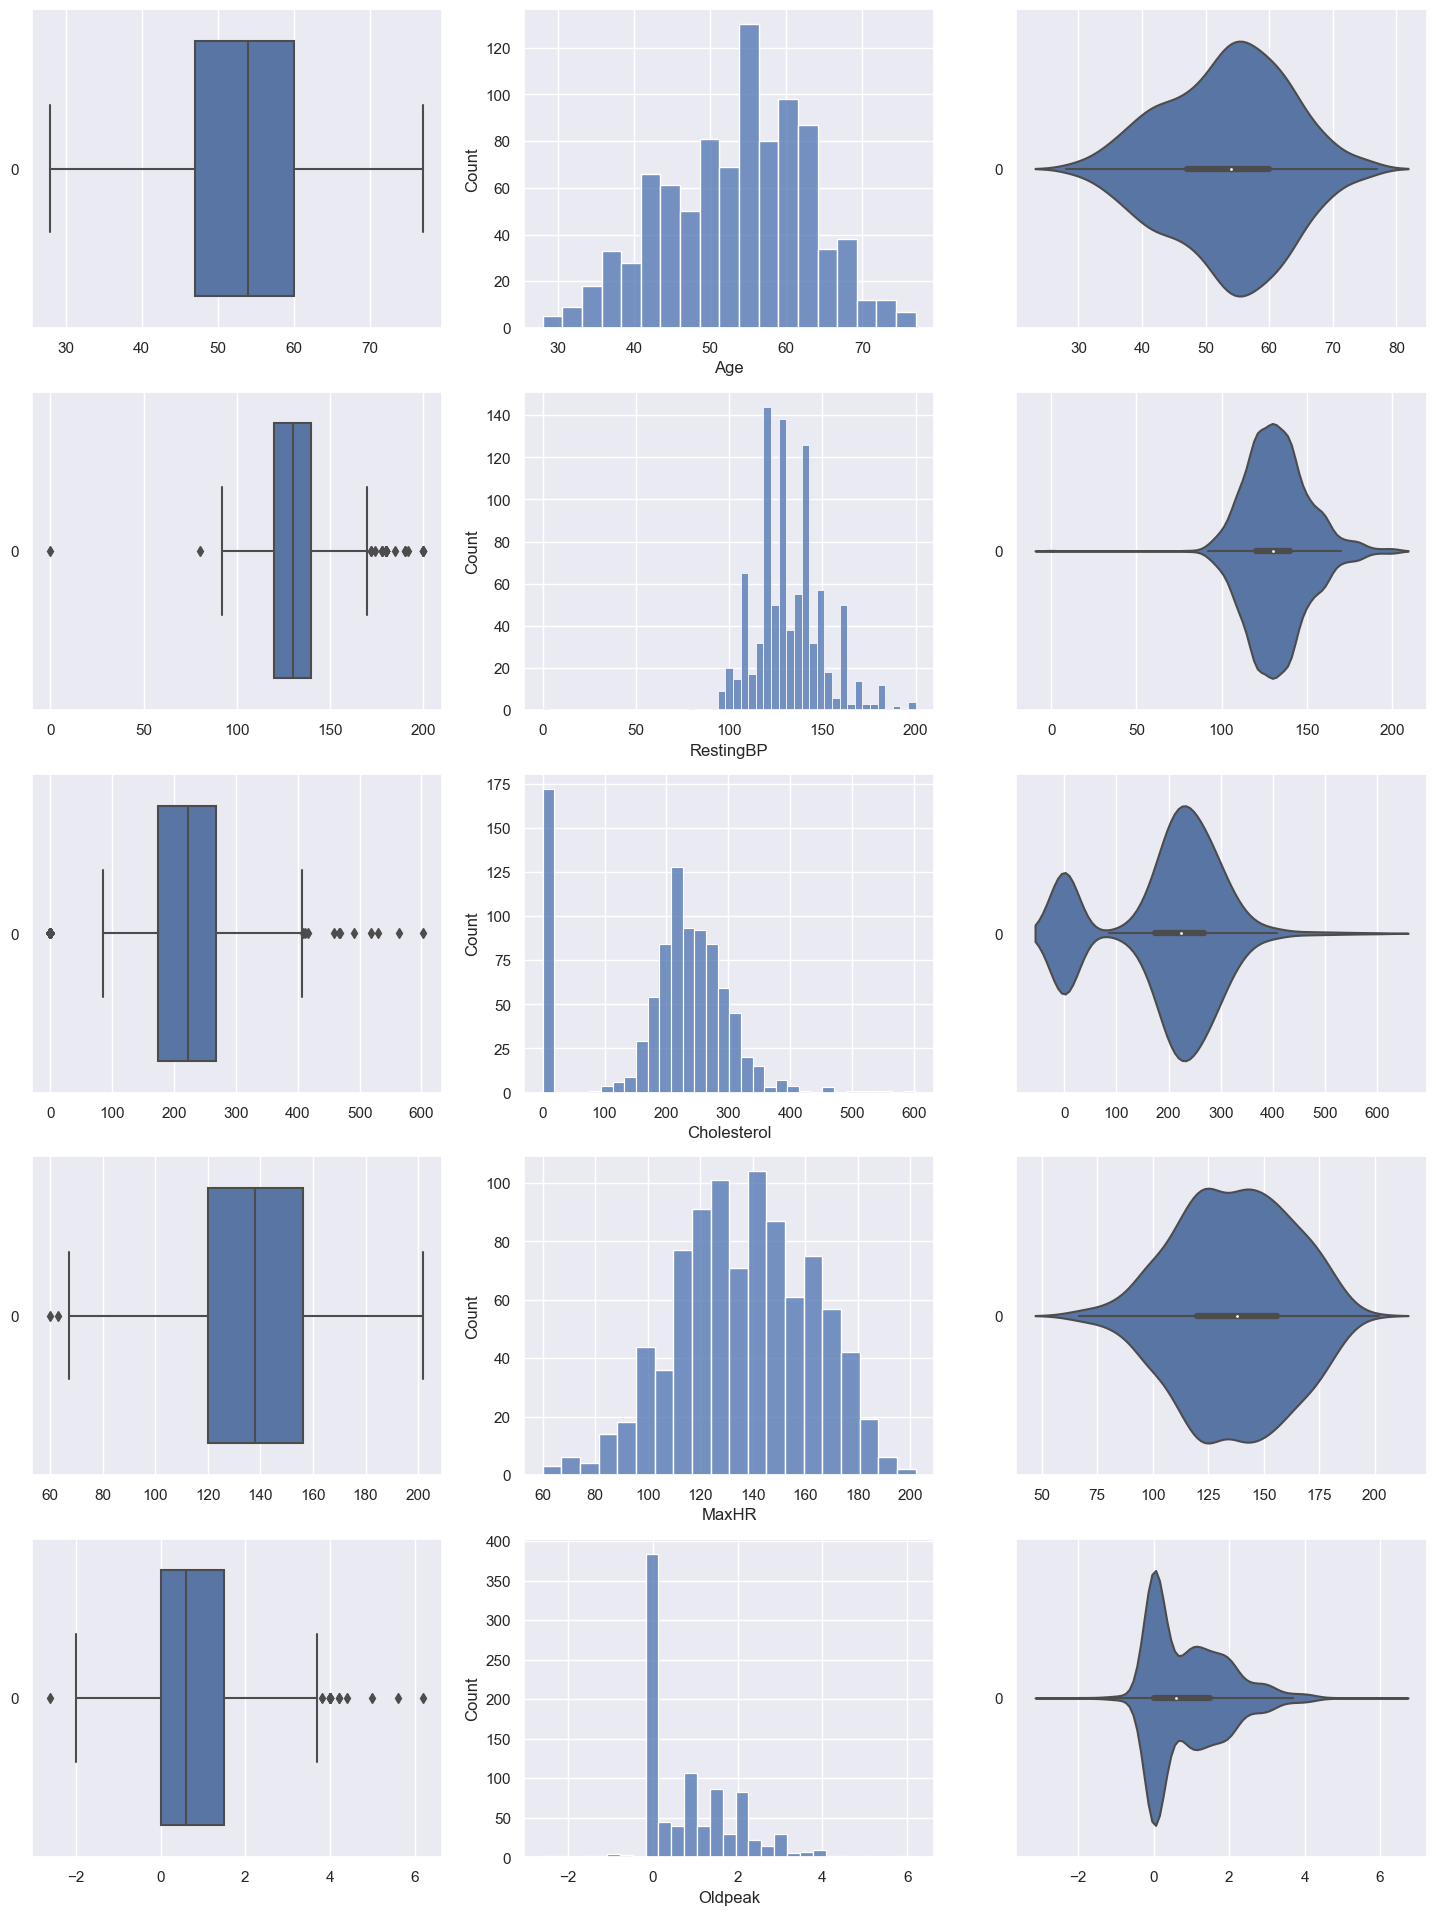

In [9]:
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in heart_num:
    sb.boxplot(data = heart_num[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = heart_num[var], ax = axes[count,1])
    sb.violinplot(data = heart_num[var], orient = "h", ax = axes[count,2])
    count += 1

In [10]:
#Calculate the complete correlation matrix
heart_num.corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612
RestingBP,0.254399,1.000000,0.100893,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148
MaxHR,-0.382045,-0.112135,0.235792,1.000000,-0.160691
Oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000


/Users/trevyen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


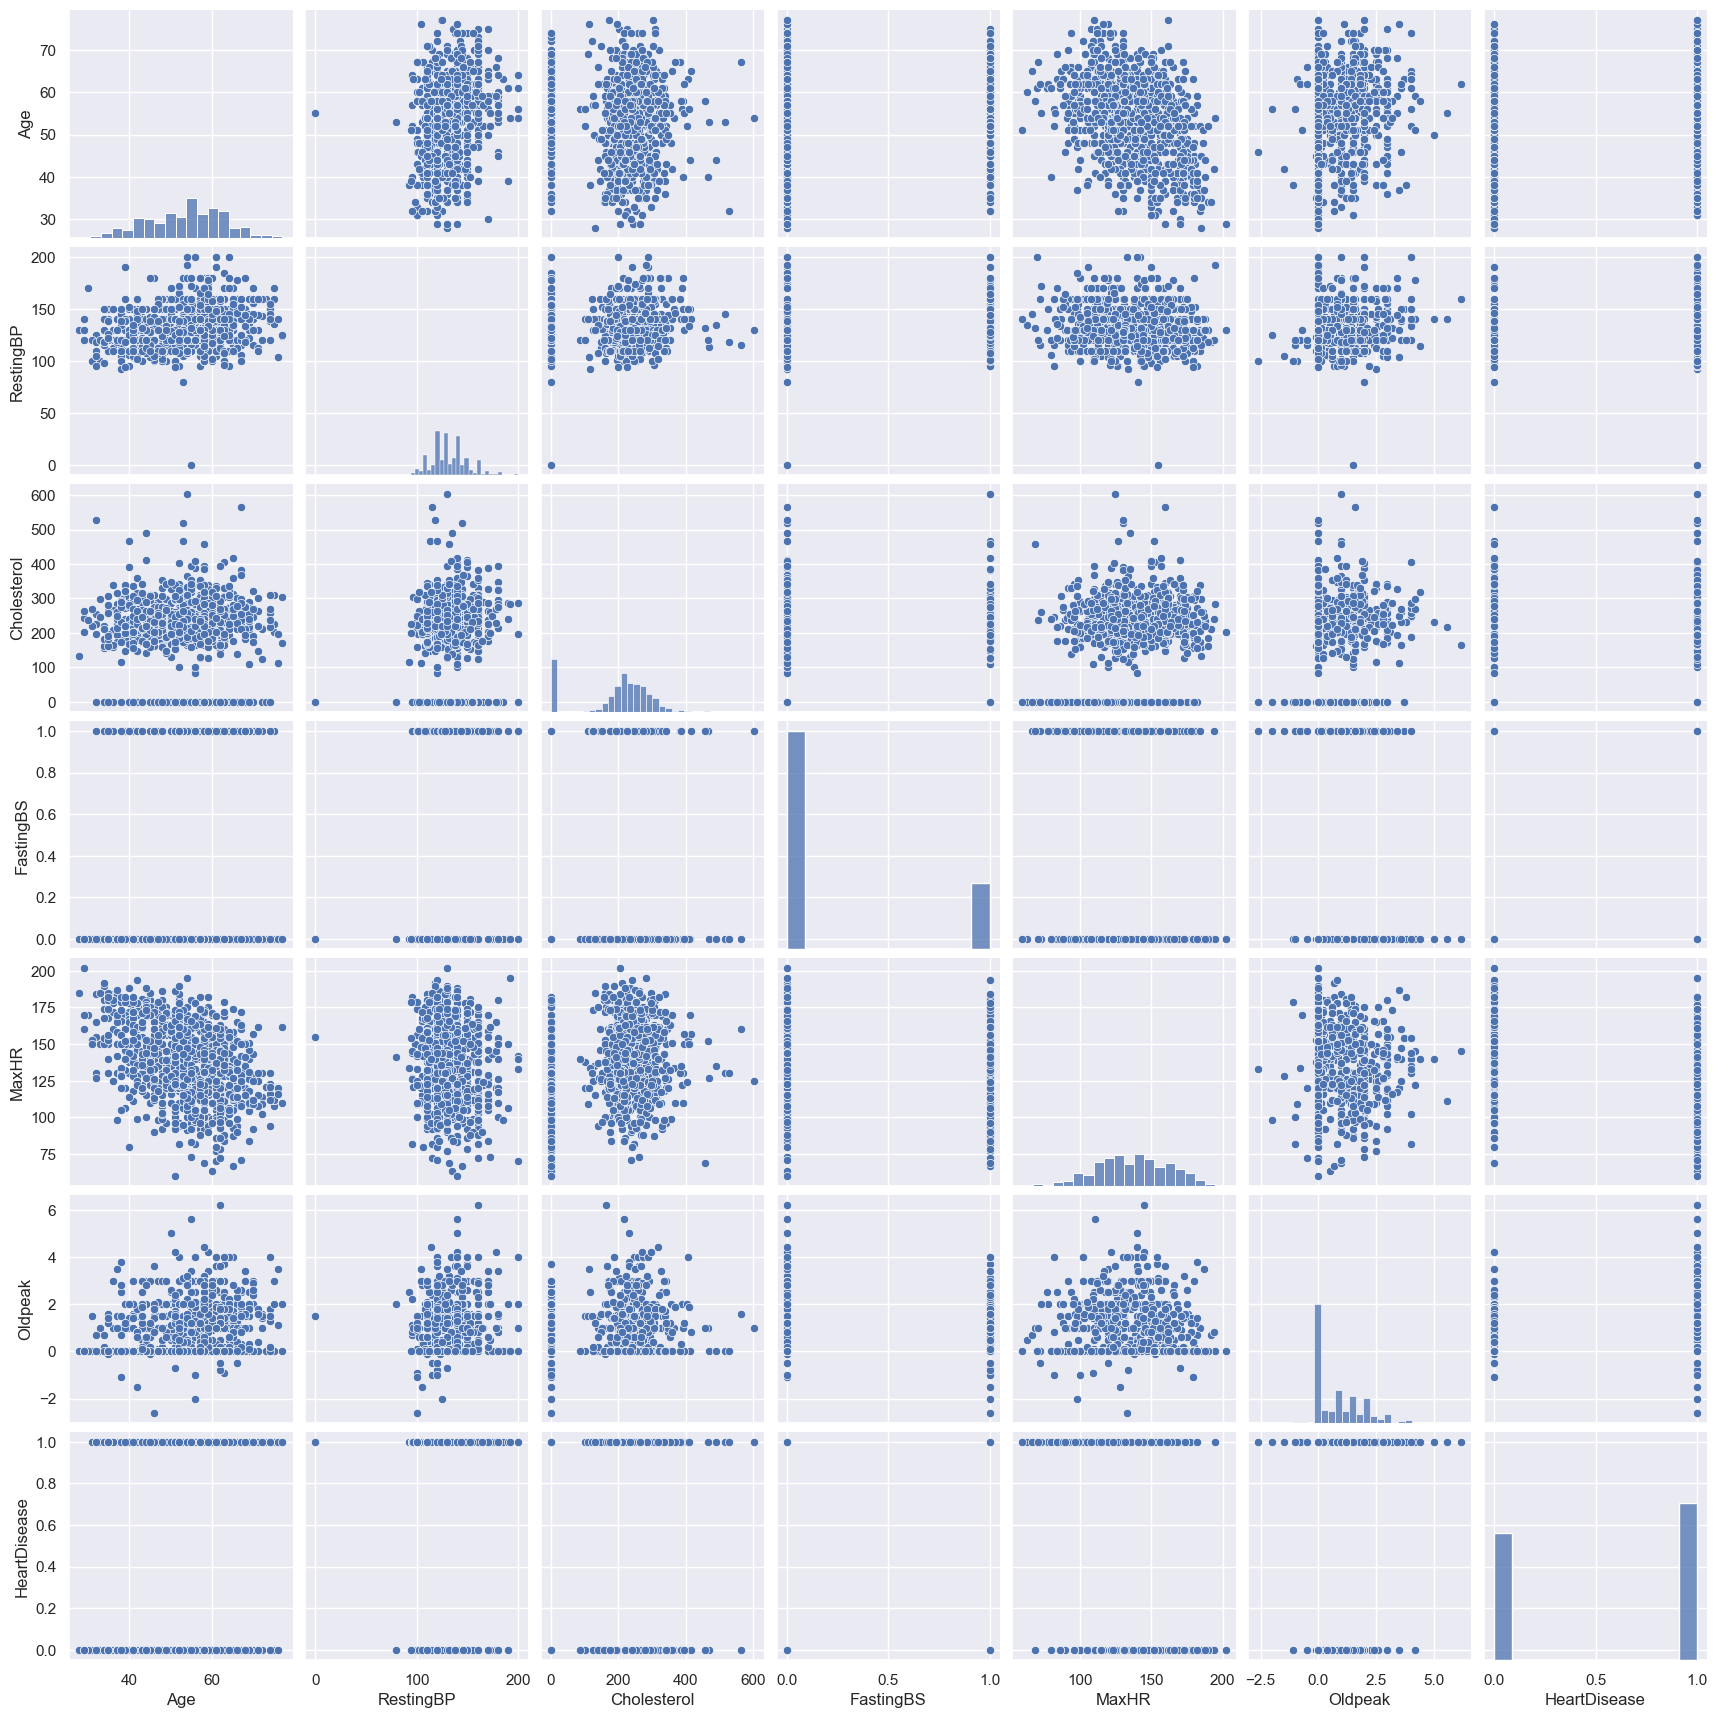

In [11]:
sb.pairplot(heart_data)

<Axes: >

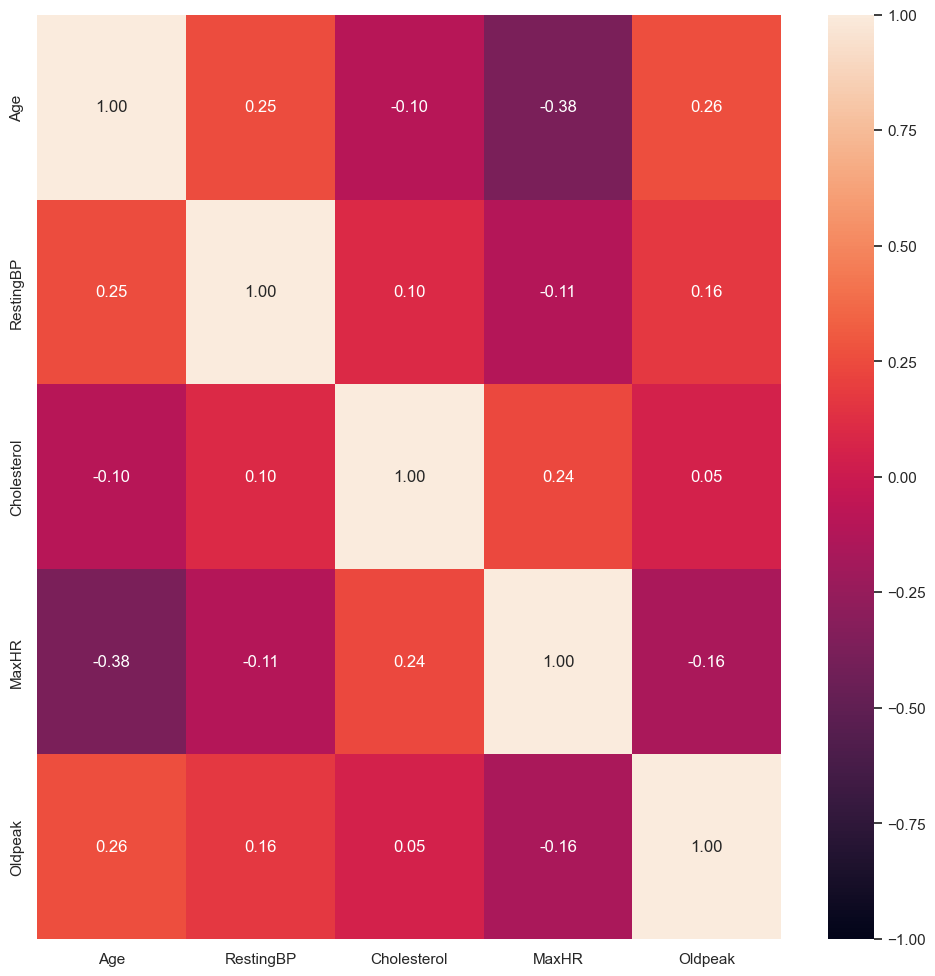

In [12]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(heart_num.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [13]:
#Removing outliers outside of IQR
def remove_outliers_IQR(df,colName):
    q1=df[colName].quantile(0.25)
    q3=df[colName].quantile(0.75)
    IQR=q3-q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = df[(df[colName] < lower_bound) | (df[colName] > upper_bound)]
    df_no_outliers = df.drop(outliers.index)
    return df_no_outliers

## One Hot Encoding for Columns 

In [14]:
cat_variables = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
heart_data = pd.get_dummies(data = heart_data, prefix = cat_variables, columns = cat_variables)
heart_data['HeartDisease'] = heart_data['HeartDisease'].astype("category")
heart_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


Changes the object data columns to categorical so that we can use the data in machine learning models.

# Decision Trees

In [15]:
features = [x for x in heart_data.columns if x not in 'HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(heart_data[features], heart_data['HeartDisease'], train_size = 0.75, random_state = 1)
print(f'train samples: {len(X_train)}')
print(f'test samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 688
test samples: 230
target proportion: 0.5334


In [16]:
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None]

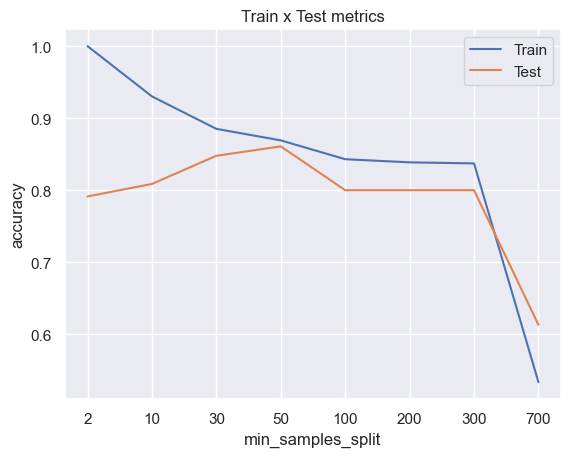

In [17]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = 1).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks= range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train', 'Test'])

Note how increasing the number of min_samples_split reduces overfitting.

Increasing min_samples_split from 10 to 30, and from 30 to 50, even though it does not improve the Test accuracy, it brings the training accuracy closer to it, showing a reduction in overfitting.

Let's do the same experiment with max_depth

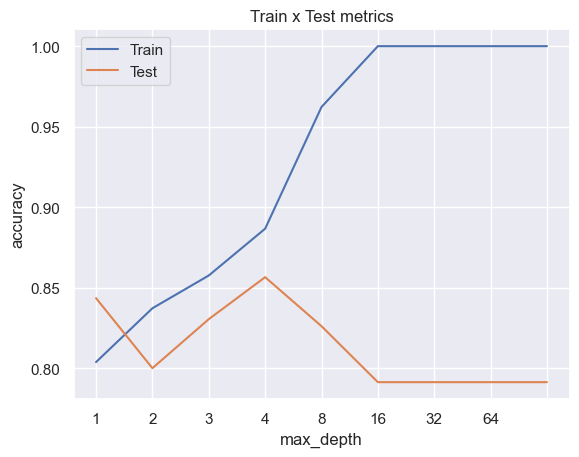

In [18]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 1).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test'])

We can see that in general, reducing max_depth can help to reduce overfitting.

Reducing max_depth from 8 to 4 increases test accuracy closer to training accuracy, while significantly reducing training accuracy. The validation accuracy reaches the highest at max_depth=4. When the max_depth is smaller than 3, both training and test accuracy decreases. The tree cannot make enough splits to distinguish positives from negatives (the model is underfitting the training set). When the max_depth is too high ( >= 5), test accuracy decreases while training accuracy increases, indicating that the model is overfitting to the training set.

In [19]:
def classificationtree(X,y,df,depth):
    X = df[X]
    y = df[y]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=0.25)
    
    #Creating the decision tree model
    dectree = DecisionTreeClassifier(min_samples_split = 50, max_depth = 3, random_state = 1).fit(X_train,y_train)
    
    
    importances = dectree.feature_importances_
    indices = np.argsort(importances)[::-1]
    print("Feature ranking:")
    for f in range(X_train.shape[1]):
        print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")
    feature_names = X.columns.tolist()
    
    #Plotting the decision tree
    f = plt.figure(figsize=(20,20))
    plot_tree(dectree, filled=True, rounded=True, feature_names= feature_names, class_names=["No","Yes"])
    
    # Predict predictors corresponding to HeartDiseaseTrain (X_train)
    f, axes = plt.subplots(1,figsize=(8, 8))
    train_pred = dectree.predict(X_train)
    print("Train Classification Accuracy \t:", dectree.score(X_train, y_train))
    sb.heatmap(confusion_matrix(y_train, train_pred),annot=True,fmt=".0f",annot_kws={"size":18})

    # Predict Predictors corresponding to HeartDiseaseTest (X_test)
    f, axes = plt.subplots(figsize=(4, 4))
    test_pred = dectree.predict(X_test)
    print("Test Classification Accuracy \t:", dectree.score(X_test,y_test))
    sb.heatmap(confusion_matrix(y_test,test_pred),annot=True,fmt=".0f",annot_kws={"size": 18})
    
    print("\n")
    
    # print classification metric
    [TPR_train, FPR_train] = binary_metric(y_train,train_pred)
    [TPR_test, FPR_test] = binary_metric(y_test,test_pred)
    print("True Positive Rate for train\t:", [TPR_train, FPR_train][0])
    print("False Positive Rate for train\t:", [TPR_train, FPR_train][1])
    print("True Positive Rate for test\t:", [TPR_test, FPR_test][0])
    print("False Positive Rate for test\t:", [TPR_test, FPR_test][1])

    
    # print classification metric
    [TPR_train, FPR_train] = binary_metric(y_train,train_pred)
    [TPR_test, FPR_test] = binary_metric(y_test,test_pred)
    print("True Positive Rate for train\t:", [TPR_train, FPR_train][0])
    print("False Positive Rate for train\t:", [TPR_train, FPR_train][1])
    print("True Positive Rate for test\t:", [TPR_test, FPR_test][0])
    print("False Positive Rate for test\t:", [TPR_test, FPR_test][1])
    
def binary_metric(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR

Feature ranking:
1. Feature 19 (0.6567491064467468)
2. Feature 2 (0.14567620965687508)
3. Feature 4 (0.08946832115435346)
4. Feature 8 (0.07299358138055856)
5. Feature 7 (0.035112781361466075)
6. Feature 18 (0.0)
7. Feature 1 (0.0)
8. Feature 3 (0.0)
9. Feature 5 (0.0)
10. Feature 6 (0.0)
11. Feature 9 (0.0)
12. Feature 10 (0.0)
13. Feature 11 (0.0)
14. Feature 12 (0.0)
15. Feature 13 (0.0)
16. Feature 14 (0.0)
17. Feature 15 (0.0)
18. Feature 16 (0.0)
19. Feature 17 (0.0)
20. Feature 0 (0.0)
Train Classification Accuracy 	: 0.8546511627906976
Test Classification Accuracy 	: 0.8347826086956521


True Positive Rate for train	: 0.8801089918256131
False Positive Rate for train	: 0.17445482866043613
True Positive Rate for test	: 0.851063829787234
False Positive Rate for test	: 0.19101123595505617
True Positive Rate for train	: 0.8801089918256131
False Positive Rate for train	: 0.17445482866043613
True Positive Rate for test	: 0.851063829787234
False Positive Rate for test	: 0.1910112359550

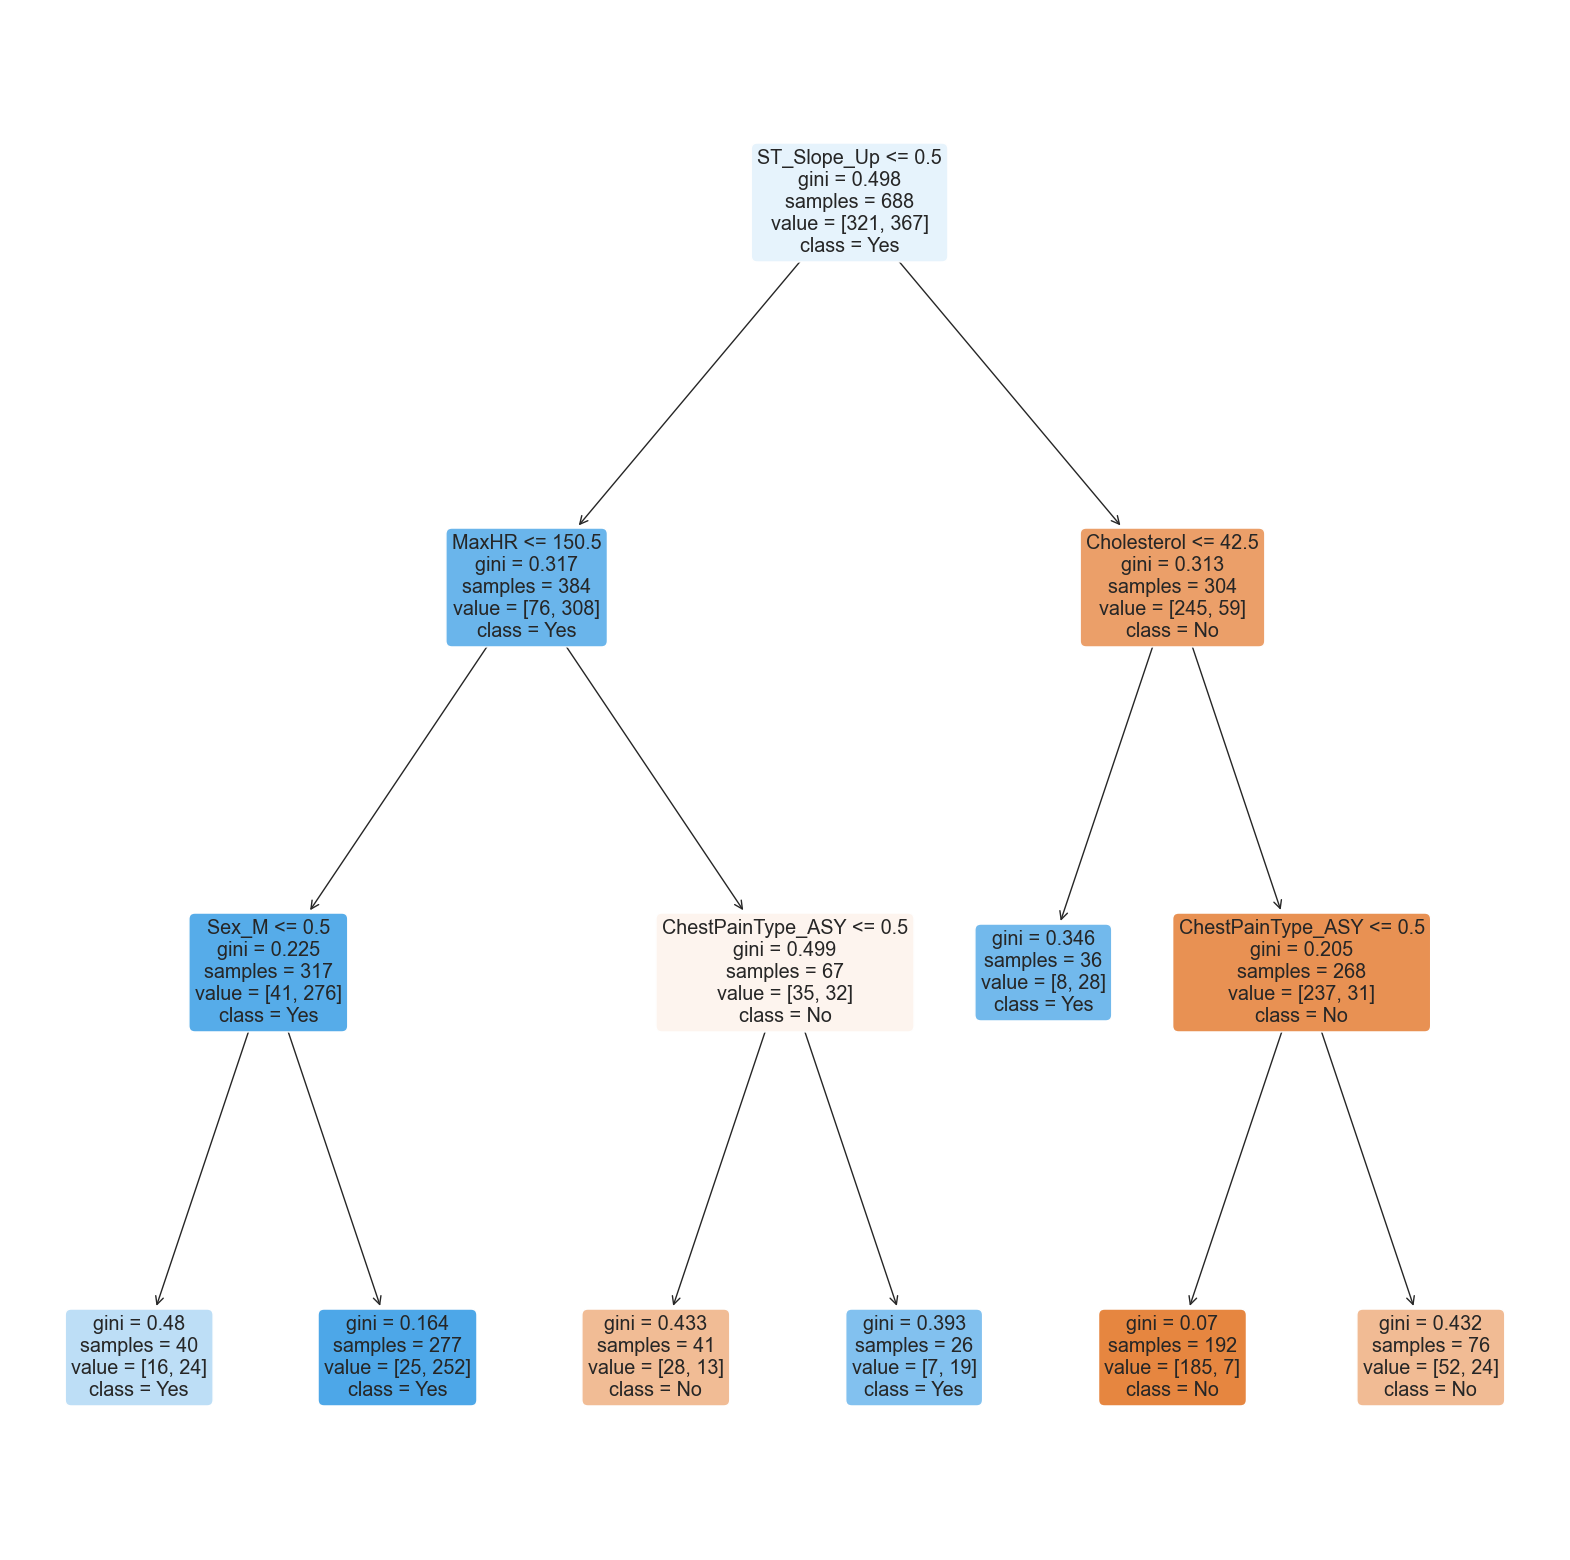

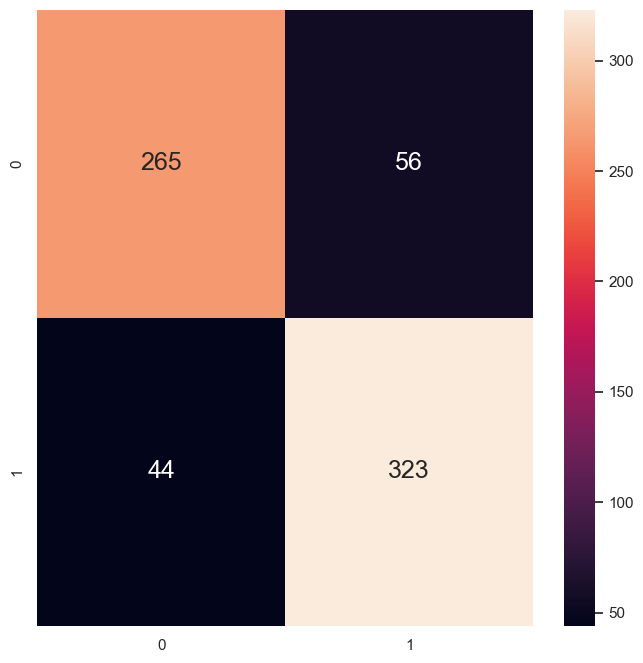

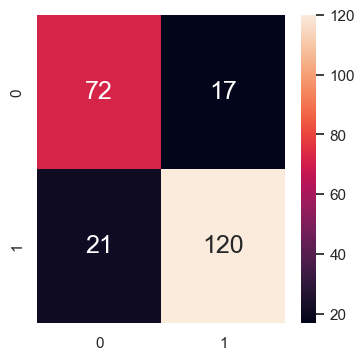

In [20]:
features = [x for x in heart_data.columns if x not in 'HeartDisease']
classificationtree(X=features, y = 'HeartDisease', df = heart_data, depth = 3)

Feature ranking:
1. Feature 2 (0.5993862400559374)
2. Feature 0 (0.31360251354498314)
3. Feature 1 (0.08701124639907934)
Train Classification Accuracy 	: 0.7543604651162791
Test Classification Accuracy 	: 0.782608695652174


True Positive Rate for train	: 0.7520435967302452
False Positive Rate for train	: 0.24299065420560748
True Positive Rate for test	: 0.8226950354609929
False Positive Rate for test	: 0.2808988764044944
True Positive Rate for train	: 0.7520435967302452
False Positive Rate for train	: 0.24299065420560748
True Positive Rate for test	: 0.8226950354609929
False Positive Rate for test	: 0.2808988764044944


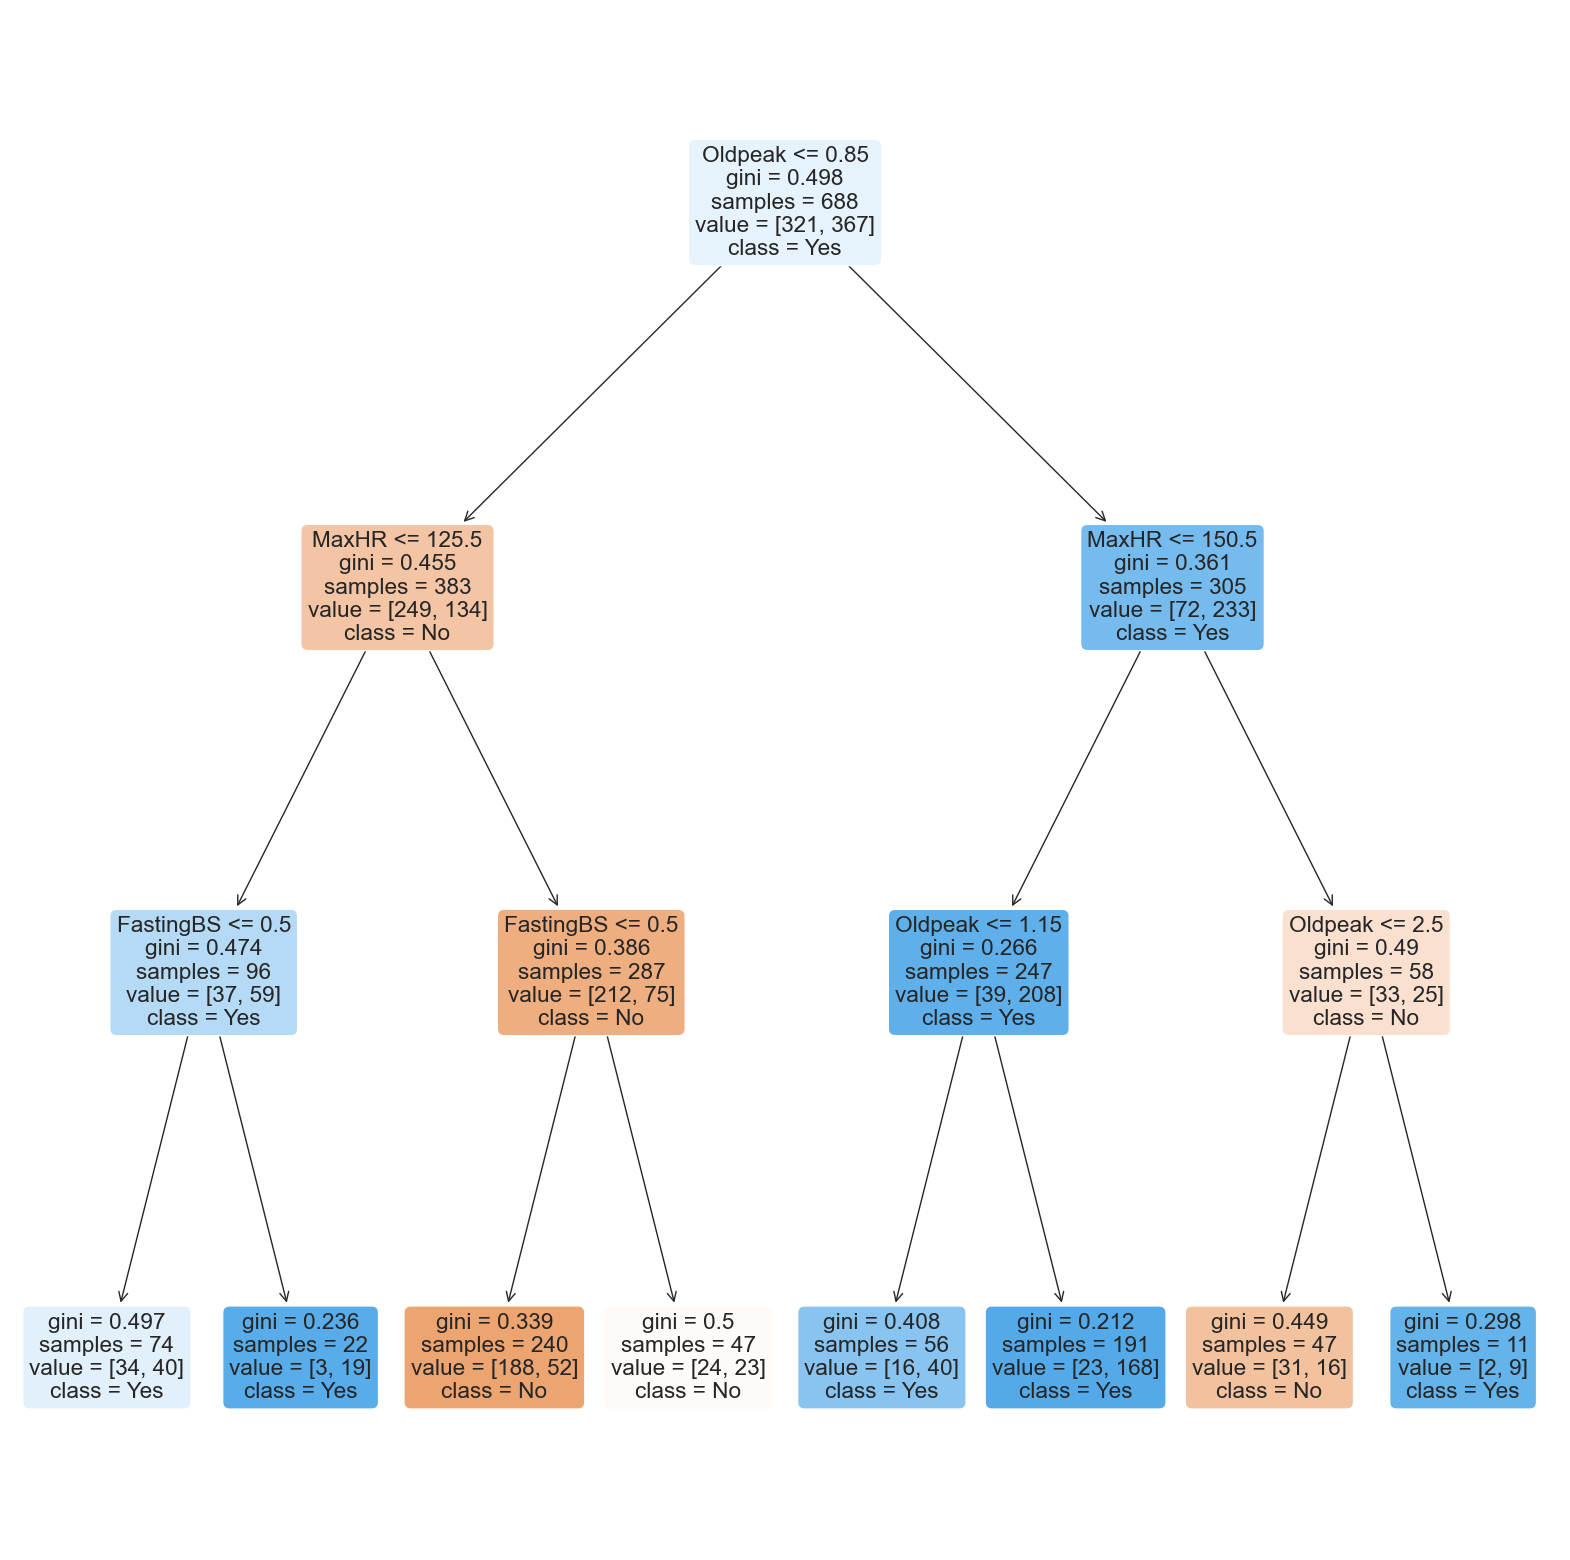

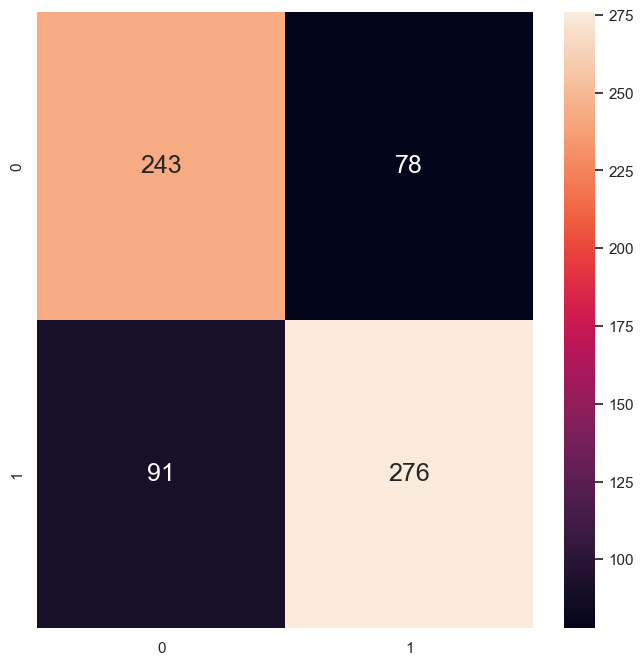

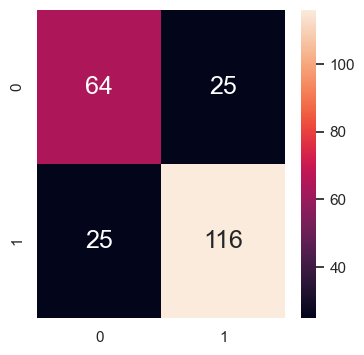

In [21]:
features = ['MaxHR', 'FastingBS', 'Oldpeak']
classificationtree(X=features, y = 'HeartDisease', df = heart_data, depth = 3)

Feature ranking:
1. Feature 2 (0.4965316744313573)
2. Feature 1 (0.369518394793353)
3. Feature 0 (0.13394993077528966)
Train Classification Accuracy 	: 0.8008720930232558
Test Classification Accuracy 	: 0.8


True Positive Rate for train	: 0.7574931880108992
False Positive Rate for train	: 0.14953271028037382
True Positive Rate for test	: 0.7801418439716312
False Positive Rate for test	: 0.16853932584269662
True Positive Rate for train	: 0.7574931880108992
False Positive Rate for train	: 0.14953271028037382
True Positive Rate for test	: 0.7801418439716312
False Positive Rate for test	: 0.16853932584269662


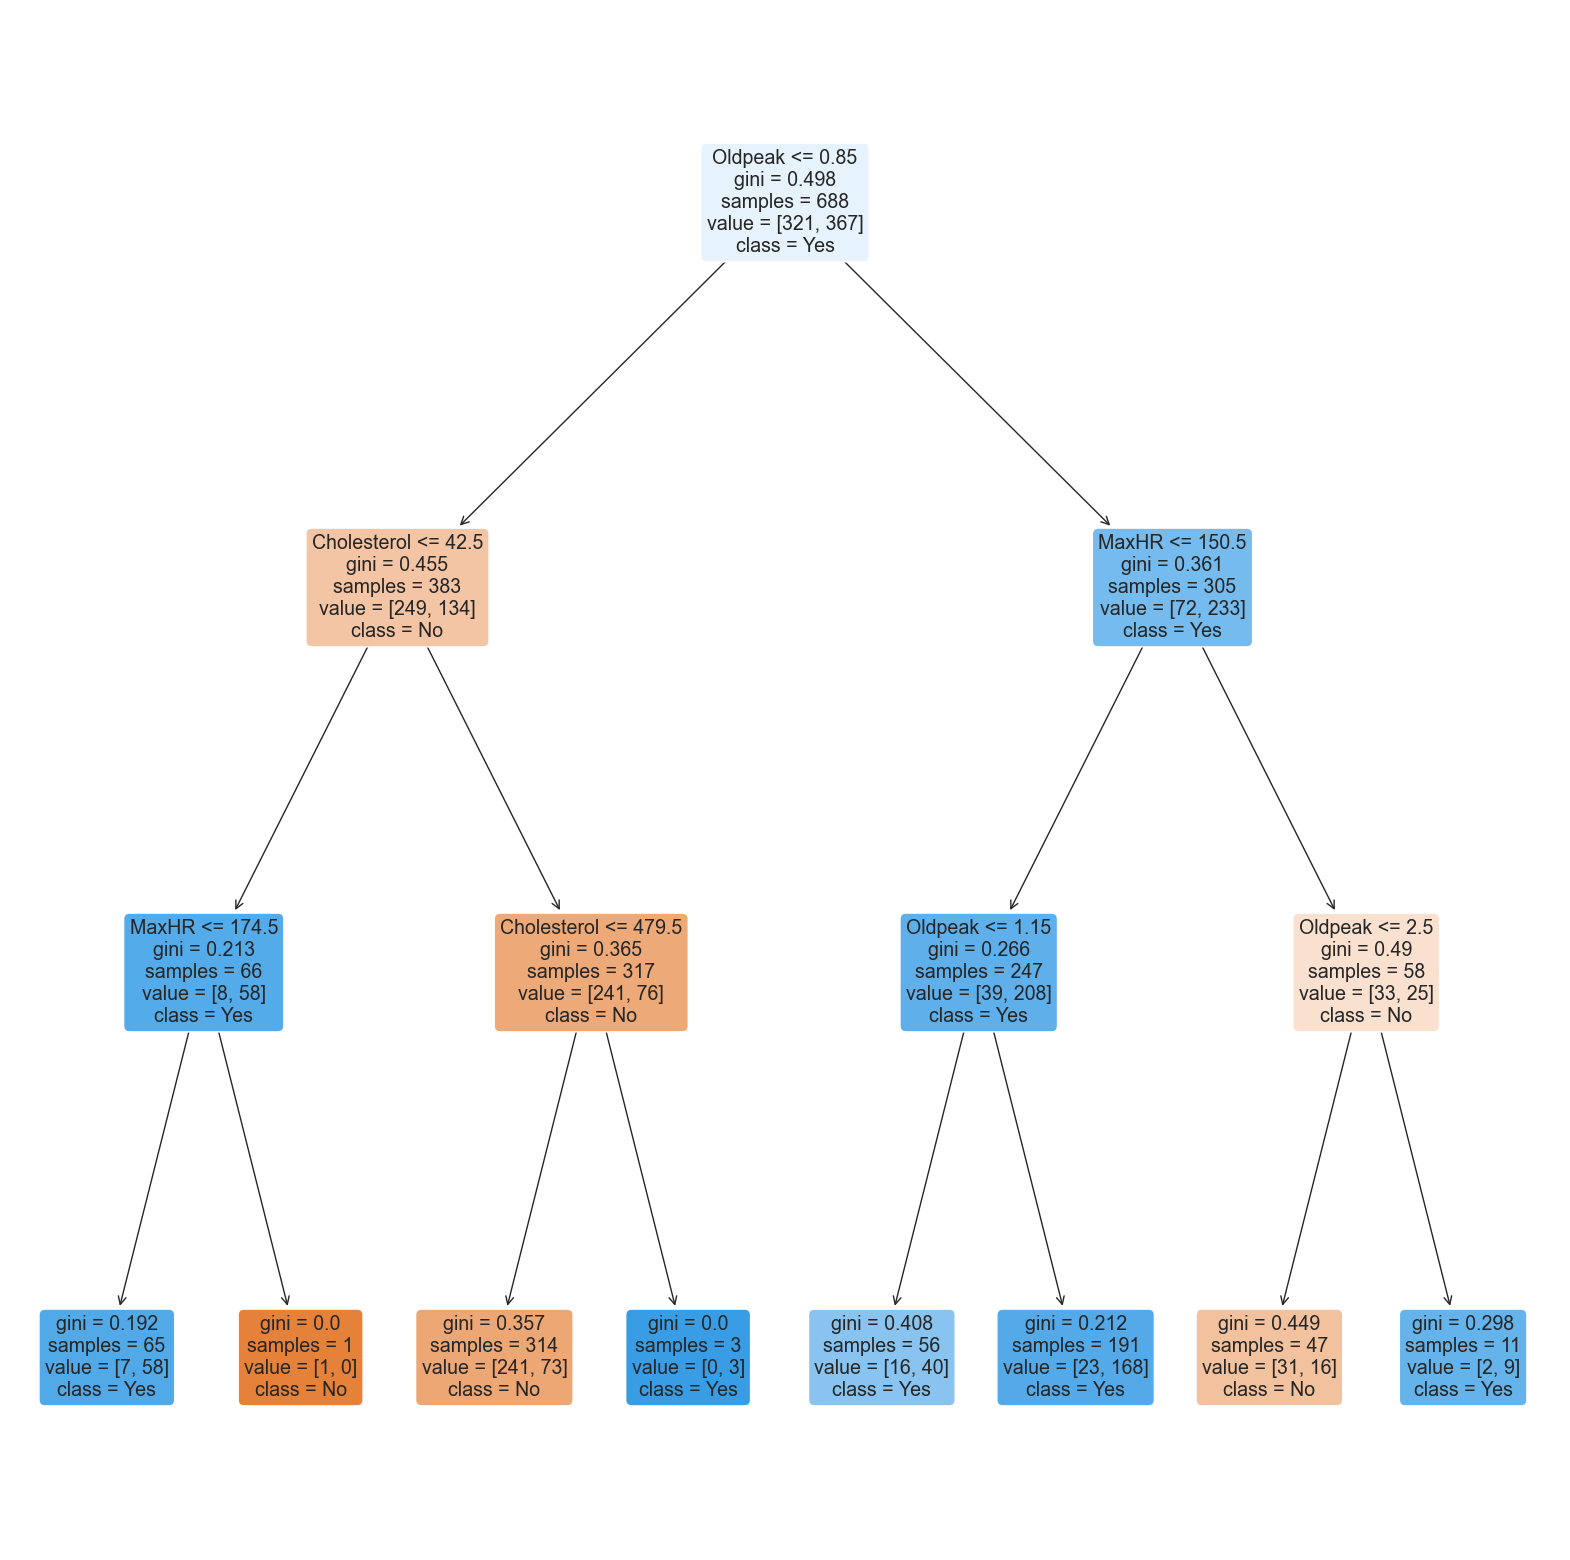

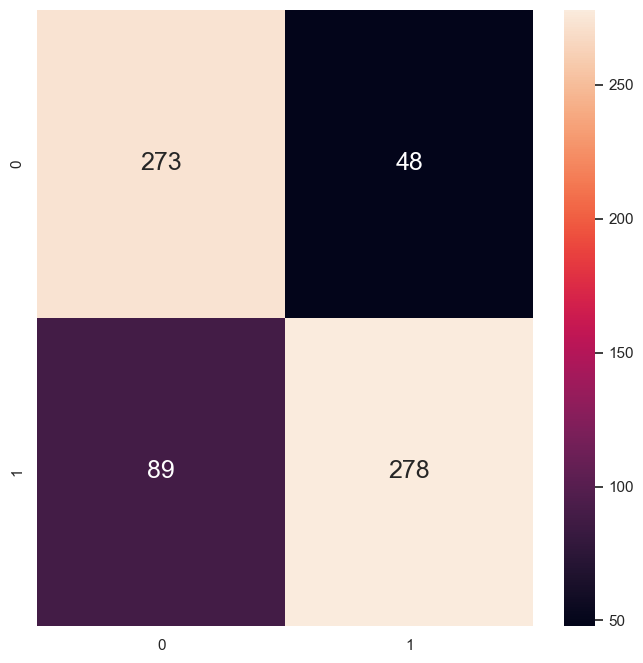

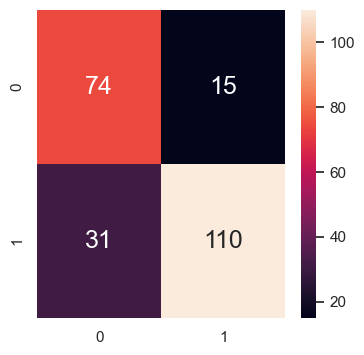

In [22]:
features = ['MaxHR', 'Cholesterol', 'Oldpeak']
classificationtree(X=features, y = 'HeartDisease', df = heart_data, depth = 3)

### Analysis of categorical variables

#### Extract the categorical variables

In [23]:
heartcategorical = heart_data.select_dtypes(include=['object'])
heartcategorical

,FastingBS
0,0
1,0
2,0
3,0
4,0
...,...
913,0
914,1
915,0
916,0


#### Basic Exploration and Visualisation of Response Variable (HeartDisease)

Summary Statistics

In [24]:
heartdiseasedata = heartcategorical['HeartDisease']
heartdiseasedata.value_counts()

KeyError: 'HeartDisease'

CountPlot

In [ ]:
sb.catplot(y = "HeartDisease", data = heartcategorical, kind = "count")

We have a roughly equal sample size of patients with heart disease and patients without heart disease.

#### Basic Exploration and Visualisation of Predictors

Summary Statistics

In [ ]:
sexdata = heartcategorical['Sex']
chestpaintypedata = heartcategorical['ChestPainType']
fastingbsdata = heartcategorical['FastingBS']
restingecgdata = heartcategorical['RestingECG']
exerciseanginadata = heartcategorical['ExerciseAngina']
stslopedata = heartcategorical['ST_Slope']

In [ ]:
print(sexdata.value_counts(), '\n')
print(chestpaintypedata.value_counts(), '\n')
print(fastingbsdata.value_counts(), '\n')
print(restingecgdata.value_counts(), '\n')
print(exerciseanginadata.value_counts(), '\n')
print(stslopedata.value_counts(), '\n')

CountPlots

In [ ]:
sb.catplot(y = "Sex", data = heartcategorical, kind = "count")
sb.catplot(y = "ChestPainType", data = heartcategorical, kind = "count")
sb.catplot(y = "FastingBS", data = heartcategorical, kind = "count")
sb.catplot(y = "RestingECG", data = heartcategorical, kind = "count")
sb.catplot(y = "ExerciseAngina", data = heartcategorical, kind = "count")
sb.catplot(y = "ST_Slope", data = heartcategorical, kind = "count")

There is a significantly larger proportion of males (79%) compared to females (21%) in this sample.

About half (54%) of the sample does not have any form of chest pain. Among those that have chest pain, Non-Anginal Pain (22% of sample) is the most common and Typical Angina Pain (5% of sample) is the least common. 

According to the Mount Sinai Health System website, a fasting blood glucose level of 126 mg/dL or higher usually signifies diabetes.(1) The majority (77%) of the sample has a fasting blood sugar level of below 125mg/dl.

More than half (60%) of the sample size has normal resting ECG results while half of the remaining (20%) has ST-T wave abnormality and the other half of the remaining (19%) has signs of probable or definite left ventricular hypertrophy (LVH) in their ECG results.

Slightly less than half (40%) of the sample has exercised-induced angina.

About half (50%) of the sample has a flat slope of peak exercise ST segment and slightly less than half (43%) has a downsloping peak exercise ST segment and the remaining (7%) has an upsloping peak exercise ST segment.

In [ ]:
from scipy.stats import chi2_contingency

# Calculate chi-squared statistics and p-values
correlations = {}
for col in heartcategorical.columns[0:6]:
    crosstab = pd.crosstab(heartcategorical['HeartDisease'], heartcategorical[col])
    chi2, p, _, _ = chi2_contingency(crosstab)
    correlations[col] = (chi2, p)

# Sort correlations by chi-squared values
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1][0], reverse=True)
sorted_correlations

The chi-square distributions are a family of distributions that take only positive
values and are skewed to the right. A particular chi-square distribution is specified by
giving its degrees of freedom.
The chi-square test for a two-way table with r rows and c columns uses critical values
from the chi-square distribution with (r – 1)(c – 1) degrees of freedom. The P-value is
the area under the density curve of this chi-square distribution to the right of the value
of the test statistic. https://www.westga.edu/academics/research/vrc/assets/docs/ChiSquareTest_LectureNotes.pdf

The data is sorted by the chi-squared value in descending order accompanied by the P-value. \
Based on this arrangement, it can be seen that the P value is also in ascending order.

>ST_Slope (Chi-Squared = 355.92, p < 0.001):

This is the most correlated variable.
The high chi-squared value indicates a strong association between ST_Slope and HeartDisease. \
The very low p-value (p < 0.001) suggests that this association is highly unlikely to be due to random chance.

>ChestPainType (Chi-Squared = 268.07, p < 0.001):

Similarly, there is a strong association between ChestPainType and HeartDisease. \
The low p-value (p < 0.001) confirms that this association is not likely due to random variation. 

>ExerciseAngina (Chi-Squared = 222.26, p < 0.001):

The chi-squared value indicates a strong association between ExerciseAngina and HeartDisease. \
The low p-value (p < 0.001) further supports the statistical significance of this association. 

>Sex (Chi-Squared = 84.15, p < 0.001):

The chi-squared value shows a significant association between Sex and HeartDisease. \
The low p-value (p < 0.001) indicates that this association is highly unlikely to occur by chance. 

>FastingBS (Chi-Squared = 64.32, p < 0.001):

There is a significant association between FastingBS and HeartDisease. \
The low p-value (p < 0.001) confirms the statistical significance of this association.

>RestingECG (Chi-Squared = 10.93, p = 0.004):

This is the least correlated variable. \
The chi-squared value suggests an association between RestingECG and HeartDisease, although it is relatively lower compared to other variables. \
The p-value (p = 0.004) is below the typical significance threshold of 0.05, indicating a statistically significant association but to a lesser extent compared to some other variables.

## Modelling

### Categorical Data

5 models will be created, including:
1. All categorical variables
2. Top 3 categorical variables based on Chi-squared value + P-value
3. Top 3 individual categorical variables based on Chi-squared value + P-value (3 Models)

In [ ]:
def randomForestTree(data,X,y):
    # Encode categorical variables
    label_encoders = {}
    for col in data.select_dtypes(include=['object']).columns:
        label_encoders[col] = LabelEncoder()
        data[col] = label_encoders[col].fit_transform(data[col])

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", model.score(X_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", model.score(X_test, y_test))
    print()
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    sb.heatmap(conf_matrix, annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Example: Plot feature importances for RandomForestClassifier
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.xlabel('Feature Importance')
    plt.title('Features')
    plt.show()
    



In [ ]:
X = heartcategorical[['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']]
y = heartcategorical['HeartDisease']
catmodel1 = randomForestTree(heartcategorical,X, y)

In [ ]:
X = heartcategorical[['ChestPainType','ExerciseAngina','ST_Slope']]

catmodel2 = randomForestTree(heartcategorical,X, y)

In [ ]:
X = heartcategorical[['ST_Slope']]

catmodel3 = randomForestTree(heartcategorical,X, y)

In [ ]:
X = heartcategorical[['ChestPainType']]

catmodel4 = randomForestTree(heartcategorical,X, y)

In [ ]:
X = heartcategorical[['ExerciseAngina']]

catmodel5 = randomForestTree(heartcategorical,X, y)

Top 5 models created (Descending Order):
> All variables: Has the highest train and test %. \
> Top 3 variables: Has the second highest train and test % \
> "ST_Slope" has higher train % but "ChestPainType" has higher test % \
> "ExerciseAngina" has the lowest %.

From this result, we can conclude that more variables being fed into the model yields a better result.
However, if comparing individuals result, more correlated should produce better results but this is not the case as "ST_Slope" has lower test % as compared to "ChestPainType". \
In other case, reducing the variables to the top 3 might yield better results as they have more data rows.